# Ein einfaches Klimamodell

## FaIR: Finite Amplitude Impulse Response simple climate model

-- Erstellt von R. Scheele, modifiziert von F. Kanngießer

Das [FaIR](https://fair.readthedocs.io/en/latest/index.html)-Modell ist ein einfaches emissionsbasiertes Klimamodell. Es ermöglicht dem Benutzer die Eingabe von Emissionen von Treibhausgasen und kurzlebigen Klimasubstanzen, um die mittleren globalen atmosphärischen Treibhausgaskonzentrationen, den Strahlungsantrieb und die Temperaturanomalien zu schätzen.

FaIR kann als Paket in Python geladen werden und verbraucht so wenig Ressourcen, dass es auch auf einfachen PCs angewendet werden kann.

In [12]:
# Laden der Bibliotheken fair, matplotlib und numpy
import fair
from fair.forward import fair_scm
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

Als Beispiel nehmen wir zunächst 4 verschiedene RCP-Szenarien[1] aus dem AR5[2] an. 

| Bezeichunung | RCP8.5 | RCP6.0 | RCP4.5 | RCP2.6 |
|:---|:-------------|:-----------|:------|:------|
| Treibhausgaskonzentration<br>im Jahr 2100<br>in ppm CO$_2$-äq | 1370 | 850 | 650 | 400 |
| Strahlungsantrieb<br>1850-2100 | 8,5 W/m$^2$ | 6,0 W/m$^2$ | 4,5 W/m$^2$ | 2,6 W/m$^2$ |
| Einstufung | sehr hoch | hoch | mittek | sehr niedrig |

RCP8.5 ist hierbei als sogenannte "baseline" eine wichtige Vergleichsgrundlage. Die Einhaltung des Parisabkommens würde ein RCP1.9-Szenario erfordern[3].

\[1] [RCP](https://wiki.bildungsserver.de/klimawandel/index.php/RCP-Szenarien) - „Repräsentative Konzentrationspfade“ bzw. Representative Concentration Pathways

\[2] [AR5](https://www.ipcc.ch/report/ar5/syr/) - 5.IPCC-Sachstandsbericht

\[3] [Carbon Brief](https://www.carbonbrief.org/explainer-how-shared-socioeconomic-pathways-explore-future-climate-change/) - vertiefende Übersicht über Emissionspfade und sozioökonomische Entwicklungspfade

In [3]:
# Laden der Emissionsszenarien
from fair.RCPs import rcp26,rcp45,rcp60,rcp85

# Durchfuehren der Simulation
# In C werden die Konzentrationen verschiedener Treibhausgase gespeichert
# In F der Strahlungsantrieb
# In T die Temperautranomalie
C26, F26, T26 = fair.forward.fair_scm(emissions=rcp26.Emissions.emissions)
C45, F45, T45 = fair.forward.fair_scm(emissions=rcp45.Emissions.emissions)
C60, F60, T60 = fair.forward.fair_scm(emissions=rcp60.Emissions.emissions)
C85, F85, T85 = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions)

In [4]:
# Hier eine Liste der Indizes von den Emissionen, Konzentrationen, Strahlungsantrieb (Forcing) und Temperatur

emission_index=['Year' , 'CO2-fossil' , 'CO2-landuse' , 'CH4' , 
                'N2O' , 'SOx' , 'CO' , 'NMVOC' , 'NOx' , 'BC' , 
                'OC' , 'NH3' , 'CF4' , 'C2F6' , 'C6F14' , 'HFC23' , 
                'HFC32' , 'HFC43-10' , 'HFC125' , 'HFC134a' , 'HFC143a' , 
                'HFC227ea' , 'HFC245fa' , 'SF6' , 'CFC11' , 'CFC12' , 
                'CFC113' , 'CFC114' , 'CFC115' , 'CCl4' , 'Methyl chloroform' , 
                'HCFC22' , 'HCFC141b' , 'HCFC142b' , 'Halon 1211' , 'Halon 1202' , 
                'Halon 1301' , 'Halon 2401' , 'CH3Br' , 'CH3Cl']
# Emission
# Index - Species - Units 
# 0 - Year - year 
# 1 - CO2-fossil - GtC/yr 
# 2 - CO2-landuse - GtC/yr 
# 3 - CH4 - Mt/yr 
# 4 - N2O - MtN2/yr 
# 5 - SOx - MtS/yr 
# 6 - CO - Mt/yr 
# 7 - NMVOC - Mt/yr 
# 8 - NOx - MtN/yr 
# 9 - BC - Mt/yr 
# 10 - OC - Mt/yr 
# 11 - NH3 - Mt/yr 
# 12 - CF4 - kt/yr 
# 13 - C2F6 - kt/yr 
# 14 - C6F14 - kt/yr 
# 15 - HFC23 - kt/yr 
# 16 - HFC32 - kt/yr 
# 17 - HFC43-10 - kt/yr 
# 18 - HFC125 - kt/yr 
# 19 - HFC134a - kt/yr 
# 20 - HFC143a - kt/yr 
# 21 - HFC227ea - kt/yr 
# 22 - HFC245fa - kt/yr 
# 23 - SF6 - kt/yr 
# 24 - CFC11 - kt/yr 
# 25 - CFC12 - kt/yr 
# 26 - CFC113 - kt/yr 
# 27 - CFC114 - kt/yr 
# 28 - CFC115 - kt/yr 
# 29 - CCl4 - kt/yr 
# 30 - Methyl chloroform - kt/yr 
# 31 - HCFC22 - kt/yr 
# 32 - HCFC141b - kt/yr 
# 33 - HCFC142b - kt/yr 
# 34 - Halon 1211 - kt/yr 
# 35 - Halon 1202 - kt/yr 
# 36 - Halon 1301 - kt/yr 
# 37 - Halon 2401 - kt/yr 
# 38 - CH3Br - kt/yr 
# 39 - CH3Cl - kt/yr

# T = Temperature anomaly

forcing_index=['CO2','CH4','N2O','All other well-mixed GHGs','Tropospheric O3',' Stratospheric O3',
               'Stratospheric water vapour from CH4 oxidation','Contrails','Aerosols',
               'Black carbon on snow', 'Land use change','Volcanic','Solar']
# Forcing
# Index - Species
# 0 - CO2
# 1 - CH4
# 2 - N2O
# 3 - All other well-mixed GHGs
# 4 - Tropospheric O3
# 5 - Stratospheric O3
# 6 - Stratospheric water vapour from CH4 oxidation
# 7 - Contrails
# 8 - Aerosols
# 9 - Black carbon on snow
# 10 - Land use change
# 11 - Volcanic
# 12 - Solar

concentration_index=['CO2', 'CH4', 'N2O', 'CF4', 'C2F6', 'C6F14', 'HFC23', 'HFC32', 
                     'HFC43-10', 'HFC125', 'HFC134a', 'HFC143a', 'HFC227ea', 'HFC245fa', 
                     'SF6', 'CFC11', 'CFC12', 'CFC113', 'CFC114', 'CFC115', 'CCl4', 
                     'Methyl chloroform', 'HCFC22', 'HCFC141b', 'HCFC142b', 'Halon 1211', 
                     'Halon 1202', 'Halon 1301', 'Halon 2401 ', 'CH3Br', 'CH3Cl']
# Concentration
# Index - Species - Units
# 0  - CO2 - ppm
# 1  - CH4 - ppb
# 2  - N2O - ppb
# 3  - CF4 - ppt
# 4  - C2F6 - ppt
# 5  - C6F14 - ppt
# 6  - HFC23 - ppt
# 7  - HFC32 - ppt
# 8  - HFC43-10 - ppt
# 9  - HFC125 - ppt
# 10 - HFC134a - ppt
# 11 - HFC143a - ppt
# 12 - HFC227ea - ppt
# 13 - HFC245fa - ppt
# 14 - SF6 - ppt
# 15 - CFC11 - ppt
# 16 - CFC12 - ppt
# 17 - CFC113 - ppt
# 18 - CFC114 - ppt
# 19 - CFC115 - ppt
# 20 - CCl4 - ppt
# 21 - Methyl chloroform - ppt
# 22 - HCFC22 - ppt
# 23 - HCFC141b - ppt
# 24 - HCFC142b - ppt
# 25 - Halon 1211 - ppt
# 26 - Halon 1202 - ppt
# 27 - Halon 1301 - ppt
# 28 - Halon 2401  - ppt
# 29 - CH3Br - ppt
# 30 - CH3Cl - ppt

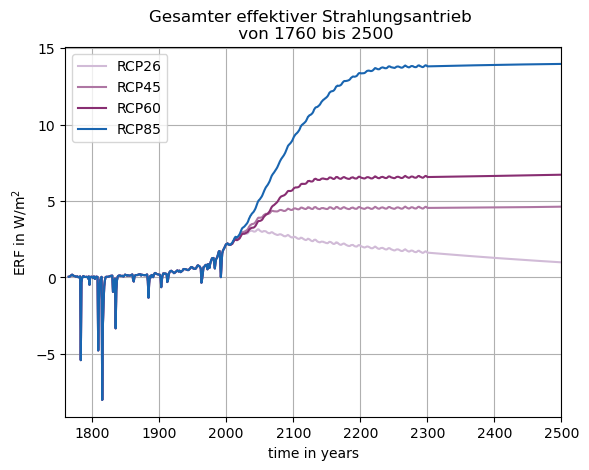

In [23]:
#Änderungen der Farbwiederholung, um Dopplungen in der übernächsten Abbildung zu vermeiden
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=['#D1BBD7','#AE76A3','#882E72','#1965B0',
                                    '#5289C7','#7BAFDE','#4EB265', '#90C987', '#CAE0AB', '#F7F056',
                                    '#F6C141','#E8601C','#DC050C'])
# Farbskala "discrete rainbow" von Paul Tol, https://personal.sron.nl/~pault/

# Strahlungsantrieb
plt.plot(rcp26.Emissions.year,np.sum(F26,axis=1), label='RCP26')
plt.plot(rcp26.Emissions.year,np.sum(F45,axis=1), label='RCP45')
plt.plot(rcp26.Emissions.year,np.sum(F60,axis=1), label='RCP60')
plt.plot(rcp26.Emissions.year,np.sum(F85,axis=1), label='RCP85')
plt.legend()
plt.title('Gesamter effektiver Strahlungsantrieb \n von 1760 bis 2500')
plt.xlim(1760,2500)
plt.xlabel('time in years')
plt.ylabel('ERF in W/m$^2$')
plt.grid()
plt.show()

#### Was ist der Grund für den negativen Strahlungsantrieb um 1800? 

Text(0, 0.5, 'Strahlungsantrieb in W/m$^2$')

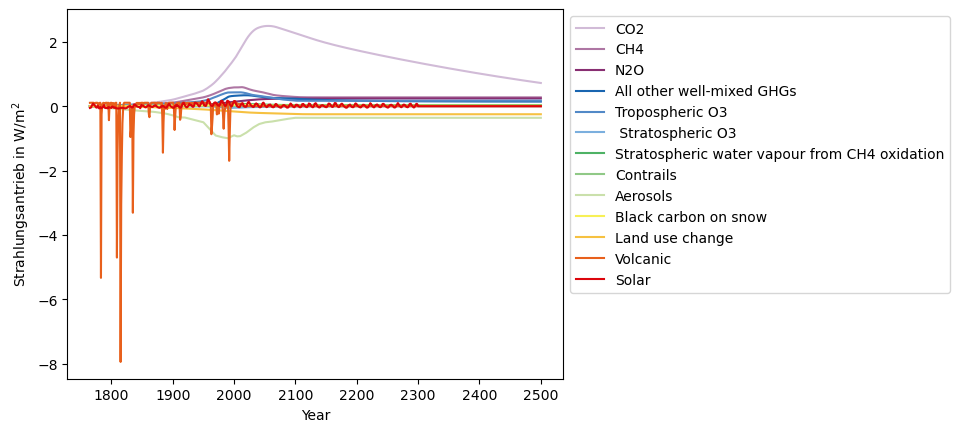

In [16]:
# Iteration über die verschiedene Strahlungsantriebe, s. oben für Übersicht
for jj,lab in enumerate(forcing_index):
    plt.plot(rcp26.Emissions.year, F26[:,jj],label=lab)
plt.legend(loc='upper left',bbox_to_anchor=(1., 1.))
plt.xlabel('Jahr')
plt.ylabel('Strahlungsantrieb in W/m$^2$')
#durch (aus)kommentieren lässt sich der betrachtete Zeitraum verändern
#plt.xlim(1800,1850)

#### Wie entwickelt sich die Temperatur? 

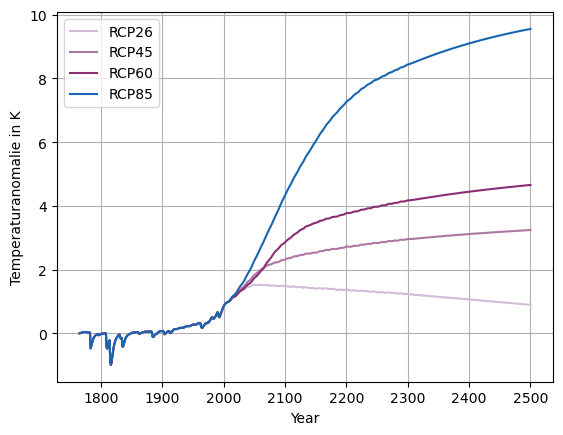

In [17]:
plt.plot(rcp85.Emissions.year, T26, label='RCP26')
plt.plot(rcp85.Emissions.year, T45, label='RCP45')
plt.plot(rcp85.Emissions.year, T60, label='RCP60')
plt.plot(rcp85.Emissions.year, T85, label='RCP85')
plt.grid()
plt.xlabel('Jahr')
plt.ylabel('Temperaturanomalie in K')
plt.legend()

#### Wie entwickeln sich die CO2 Emissionen bis 2100? 

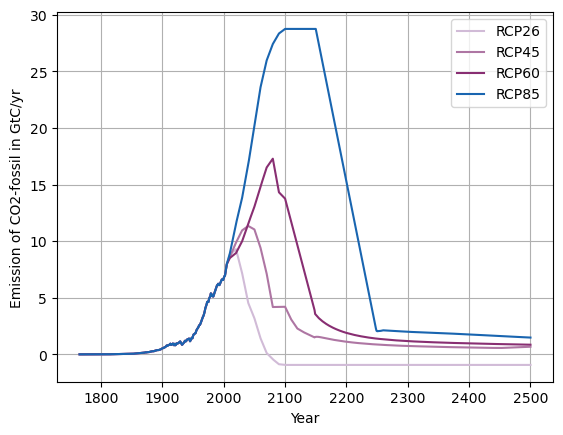

In [18]:
plt.plot(rcp26.Emissions.emissions[:,0],rcp26.Emissions.emissions[:,1] , label='RCP26')
plt.plot(rcp45.Emissions.emissions[:,0],rcp45.Emissions.emissions[:,1] , label='RCP45')
plt.plot(rcp60.Emissions.emissions[:,0],rcp60.Emissions.emissions[:,1] , label='RCP60')
plt.plot(rcp85.Emissions.emissions[:,0],rcp85.Emissions.emissions[:,1] , label='RCP85')
plt.xlabel('Year')
plt.ylabel('Emission of CO2-fossil in GtC/yr')
plt.grid()
plt.legend()

#### Wie sieht deine Zukunft aus?

Verändere die Emissionen!

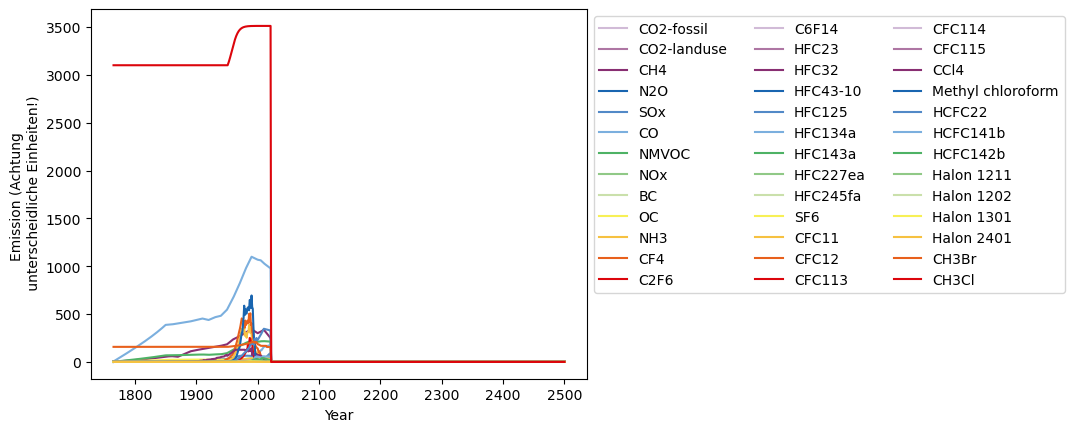

In [19]:
# No change of emissions after 2021? oder keine Emissionen mehr?
your_future_emissions=rcp26.Emissions.emissions.copy()
# der Index 257 ist das Jahr 2022, alle Emissionen nach dem Jahr 2022 werden in der folgenden Zeile auf Null gesetzt
your_future_emissions[257:,1:]=0# Zero Emission
# wenn du die nächste Code-Zeile verwendest (auskommentierst) geht man davon aus,
# dass die Emissionen ab dem Jahr 2021 konstant bleiben
#your_future_emissions[257:,1:]= your_future_emissions[256,1:] # Constant emission

# Hier nun die von dir verwendeten Emissionen
for jj,label in enumerate(emission_index[1:]):
    plt.plot(your_future_emissions[:,0], your_future_emissions[:,jj+1], label=label)
plt.xlabel('Year')
plt.ylabel('Emission (Achtung \n unterscheidliche Einheiten!)')
plt.legend(loc='upper left',bbox_to_anchor=(1., 1.), ncol=3)
plt.show()

In [21]:
# Berechnung der Temperatur und des Strahlungsantriebes
Cyfe, Fyfe, Tyfe = fair.forward.fair_scm(emissions=your_future_emissions)

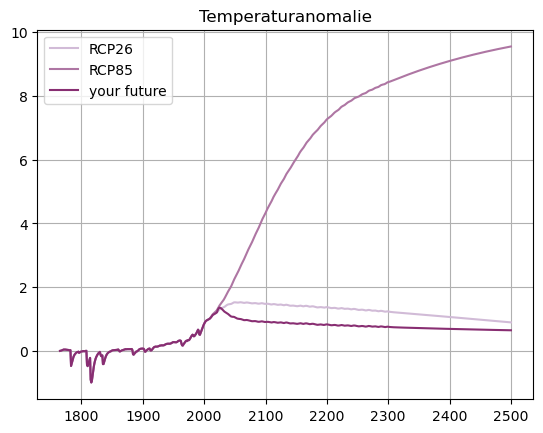

In [22]:
# Vergleich der Temperaturanomlie deines Szenarium, RCP2.6 und RCP8.5
plt.plot(rcp26.Emissions.year, T26, label='RCP26')
plt.plot(rcp85.Emissions.year, T85, label='RCP85')
plt.plot(your_future_emissions[:,0], Tyfe, label='your future')
plt.title("Temperaturanomalie")
plt.grid()
plt.legend()
plt.show()